In [1]:
from pandas import read_csv
from datetime import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


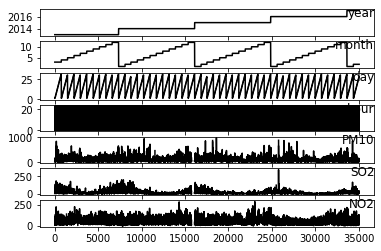

In [37]:
# generating dataset plot
from pandas import read_csv
from matplotlib import pyplot
dataset = read_csv('PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv', header=0, index_col=0)
values = dataset.values
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group],'k')
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [30]:
# # load and process data
# def parse(x):
# 	return datetime.strptime(x, '%Y %m %d %H')
# dataset = read_csv('PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
# dataset.drop('No', axis=1, inplace=True)
# dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
# dataset.index.name = 'date'
# dataset['pollution'].fillna(0, inplace=True)
# dataset = dataset[24:]
# print("||"*40)
# print("** DATA PROCESSING COMPLETED **")
# print(dataset.head(5))
# print("||"*40)
# dataset.to_csv('pollution.csv')

In [38]:
# load dataset
dataset = read_csv('PRSA_Data_20130301-20170228\Combined_Data.csv', header=0, index_col=0)
values = dataset.values
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = s_to_super(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print("** NOT REQUIRED DATA COLUMNS DROPPED **")
print("||"*40)
# split data into training and testing, futher splitting the train and test sets into i/p and o/p variables
# reshaped data further into 3D formate expected by LSTMs

** NOT REQUIRED DATA COLUMNS DROPPED **
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


In [39]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print("** DATA SPLITTING COMPLETED **")
print(" Training data shape X, y => ",train_X.shape, train_y.shape," Testing data shape X, y => ", test_X.shape, test_y.shape)
print("||"*40)
# defining LSTM with 50 neurons in first hidden layer and 1 neuron in the o/p layer
# using the MAE loss function and Adma version of stochastic gradient descent

** DATA SPLITTING COMPLETED **
 Training data shape X, y =>  (8760, 1, 22) (8760,)  Testing data shape X, y =>  (412006, 1, 22) (412006,)
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


W0715 20:47:25.225034  5876 deprecation_wrapper.py:119] From C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 20:47:26.540171  5876 deprecation_wrapper.py:119] From C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 20:47:26.965932  5876 deprecation_wrapper.py:119] From C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 20:47:29.130074  5876 deprecation_wrapper.py:119] From C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0715 20:47:29

Train on 8760 samples, validate on 412006 samples
Epoch 1/50
 - 14s - loss: 0.3395 - val_loss: 0.1450
Epoch 2/50
 - 9s - loss: 0.0397 - val_loss: 0.0528
Epoch 3/50
 - 9s - loss: 0.0126 - val_loss: 0.0513
Epoch 4/50
 - 9s - loss: 0.0108 - val_loss: 0.0504
Epoch 5/50
 - 8s - loss: 0.0095 - val_loss: 0.0501
Epoch 6/50
 - 9s - loss: 0.0088 - val_loss: 0.0502
Epoch 7/50
 - 9s - loss: 0.0081 - val_loss: 0.0502
Epoch 8/50
 - 9s - loss: 0.0078 - val_loss: 0.0502
Epoch 9/50
 - 8s - loss: 0.0076 - val_loss: 0.0505
Epoch 10/50
 - 8s - loss: 0.0075 - val_loss: 0.0501
Epoch 11/50
 - 9s - loss: 0.0074 - val_loss: 0.0502
Epoch 12/50
 - 9s - loss: 0.0074 - val_loss: 0.0500
Epoch 13/50
 - 9s - loss: 0.0074 - val_loss: 0.0498
Epoch 14/50
 - 10s - loss: 0.0074 - val_loss: 0.0496
Epoch 15/50
 - 9s - loss: 0.0073 - val_loss: 0.0496
Epoch 16/50
 - 8s - loss: 0.0073 - val_loss: 0.0493
Epoch 17/50
 - 8s - loss: 0.0073 - val_loss: 0.0489
Epoch 18/50
 - 9s - loss: 0.0072 - val_loss: 0.0489
Epoch 19/50
 - 10s - 

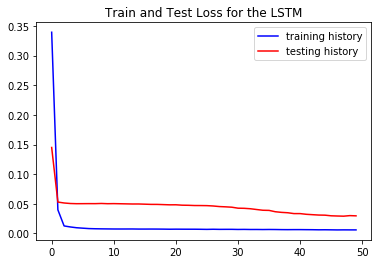

In [40]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
model = Sequential()
# 50 neurons in first hidden layer
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1,kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# tracking history for plots
pyplot.plot(history.history['loss'], 'b', label='training history')
pyplot.plot(history.history['val_loss'],  'r',label='testing history')
pyplot.title("Train and Test Loss for the LSTM")
pyplot.legend()
pyplot.show()

In [42]:
# evaluating model
# make a prediction
# from math import sqrt
# from numpy import concatenate
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# inv_y = scaler.inverse_transform(test_X)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

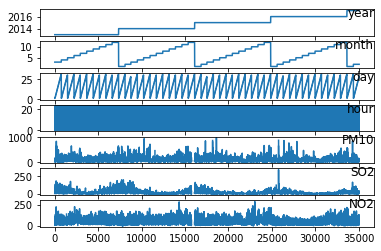

In [20]:
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7] 

i = 1
# plot each column
pyplot.figure()

for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
    
pyplot.show()

